In [70]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [71]:
ds = pd.read_csv('Universities.csv')
ds.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [72]:
# normalizing data using minmaxscaler
from sklearn.preprocessing import MinMaxScaler

Scaler = MinMaxScaler()
transformed_input = Scaler.fit_transform(ds.iloc[:,1:])  # can't transform 0th column which is university name
#transformed_input

In [73]:
# output is in array form will convert to dataframe
colsName = {'SAT','Top10','Accept','SFRatio','Expenses','GradRate'}

transformed_data = pd.DataFrame(transformed_input, columns=colsName)
transformed_data.head()

,SFRatio,GradRate,Expenses,SAT,Top10,Accept
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667


In [74]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch  # for creating dendrogram


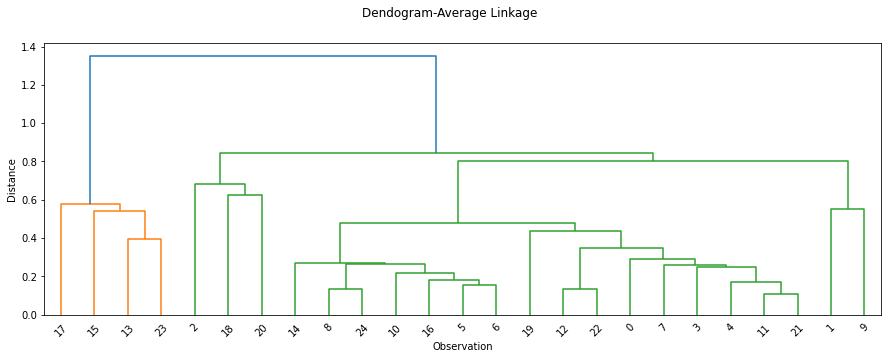

In [75]:
#creating dendogram
# Using single linkage

plt.figure(figsize=(15,5))
plt.suptitle('Dendogram-Average Linkage')
plt.xlabel('Observation')
plt.ylabel('Distance')
dendrogram = sch.dendrogram(sch.linkage(transformed_data, method='average'))

#### Now by observing the dendrogram graph we can see that 5 clusters are possible with the university dataset

In [76]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=5,linkage='complete')
y_pred = hc.fit_predict(transformed_data)
y_pred

array([3, 4, 2, 3, 3, 0, 0, 3, 0, 0, 0, 3, 3, 1, 0, 1, 0, 1, 2, 0, 2, 3,
       3, 1, 0], dtype=int64)

In [84]:
# adding the clusters to the original dataframe
ds['Clusters'] = y_pred
ds

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Clusters
0,Brown,1310,89,22,13,22704,94,3
1,CalTech,1415,100,25,6,63575,81,4
2,CMU,1260,62,59,9,25026,72,2
3,Columbia,1310,76,24,12,31510,88,3
4,Cornell,1280,83,33,13,21864,90,3
5,Dartmouth,1340,89,23,10,32162,95,0
6,Duke,1315,90,30,12,31585,95,0
7,Georgetown,1255,74,24,12,20126,92,3
8,Harvard,1400,91,14,11,39525,97,0
9,JohnsHopkins,1305,75,44,7,58691,87,0


In [88]:
# this will show the average score of the each column for each cluster
# so, the average sat score cluster 0 universities is 1348 and fees is 38377
# similarly for the average sat score for cluster 1 universities is 1061 and fees is 9953

ds.iloc[:,1:].groupby(ds.Clusters).mean()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Clusters
Clusters,,,,,,,
0,1348.888889,87.777778,27.111111,10.444444,38377.444444,92.888889,0.0
1,1061.500000,38.750000,70.000000,19.250000,9953.000000,71.750000,1.0
2,1226.666667,74.000000,55.666667,14.000000,18545.333333,78.333333,2.0
3,1272.500000,80.625000,33.000000,12.375000,22535.000000,91.125000,3.0
4,1415.000000,100.000000,25.000000,6.000000,63575.000000,81.000000,4.0


In [89]:
# all these universities belong to cluster 1
ds[ds['Clusters']==1]

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Clusters
13,PennState,1081,38,54,18,10185,80,1
15,Purdue,1005,28,90,19,9066,69,1
17,TexasA&M,1075,49,67,25,8704,67,1
23,UWisconsin,1085,40,69,15,11857,71,1


In [90]:
# all these universities belong to cluster 2
ds[ds['Clusters']==2]

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Clusters
2,CMU,1260,62,59,9,25026,72,2
18,UCBerkeley,1240,95,40,17,15140,78,2
20,UMichigan,1180,65,68,16,15470,85,2
